In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def show_curve(ys0, ys1, title, position='high right'):
    """
    plot curlve for Loss and Accuacy
    Args:
        ys: loss or acc list
        title: loss or accuracy
    """
    x0 = np.array(range(len(ys0)))
    x1 = np.array(range(len(ys1)))
    y0 = np.array(ys0)
    y1 = np.array(ys1)
    plt.plot(x0, y0, c='b', label='origin_model')
    plt.plot(x1, y1, c='r', label='my_model')
    plt.legend(loc=position)
    plt.axis()
    plt.title('{} curve'.format(title))
    plt.xlabel('Epoch)')
    plt.ylabel('{}'.format(title))
    plt.show()

In [53]:
def get_data(filename):
    f = open(filename)
    loss = []
    perplexity = []
    sum0 = 0
    sum1 = 0
    count = 0
    for line in f.readlines():
        line = line.strip().split(' ')
        if line != ['']:
            if line[1] == 'Epoch':
                if count == 0:
                    continue
                loss.append(sum0/count)
                perplexity.append(sum1/count)
                sum0 = 0
                sum1 = 0
                count = 0
            if line[1] == 'Step':
                count += 1
                sum0 += float(line[5])
                sum1 += float(line[8])

    f.close()
    return loss, perplexity

In [54]:
loss_origin, perplexity_origin = get_data('origin_model.txt')
loss_my, perplexity_my = get_data('my_model.txt')

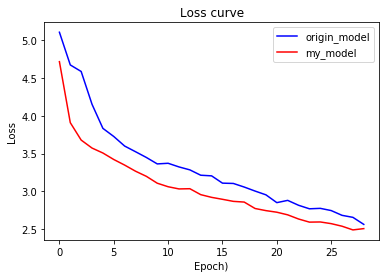

In [55]:
show_curve(loss_origin, loss_my, 'Loss', 'upper right')

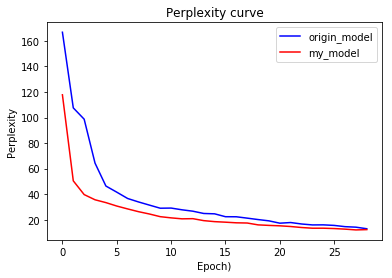

In [56]:
show_curve(perplexity_origin, perplexity_my, 'Perplexity', 'upper right')

In [3]:
f = open('my_model.txt')
loss = []
perplexity = []
for line in f.readlines():
    line = line.strip().split(' ')
    if line != ['']:
        if line[1] == 'Step':
            loss.append(float(line[5]))
            perplexity.append(float(line[8]))
f.close()

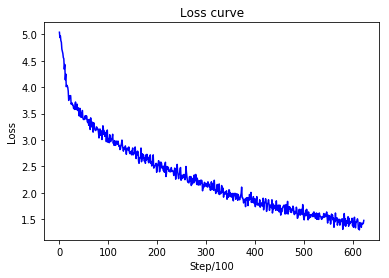

In [4]:
x0 = np.array(range(len(loss)))
y0 = np.array(loss)
y1 = np.array(perplexity)
plt.plot(x0, loss, c='b')
plt.axis()
plt.title('{} curve'.format('Loss'))
plt.xlabel('Step/100')
plt.ylabel('{}'.format('Loss'))
plt.show()

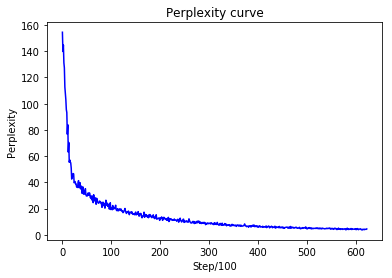

In [5]:
plt.plot(x0, perplexity, c='b')
plt.axis()
plt.title('{} curve'.format('Perplexity'))
plt.xlabel('Step/100')
plt.ylabel('{}'.format('Perplexity'))
plt.show()